Author: Vinícius Antoino Ramos Zecca

LinkedIn: /viniciusarz

Github: /ViniciusARZ

Using the classic dataset from a German Credit Risk with target bias, in other words "good" and "bad" loans from Kaggle, which can be [accessed here](https://www.kaggle.com/kabure/german-credit-data-with-risk?select=german_credit_data.csv) to study **Decision Trees** building and ploting, along with Machine Learning analysis on the Predictive Decision Model using R.

Calling packages and reading the head of the dataset

In [74]:
install.packages("rpart")
install.packages("ROCR")
library("rpart")
library("ROCR")

data = read.csv("/content/german_credit_data.csv")
head(data)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,X,Age,Sex,Job,Housing,Saving.accounts,Checking.account,Credit.amount,Duration,Purpose,Risk
,<int>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
1,0,67,male,2,own,NA,little,1169,6,radio/TV,good
2,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
3,2,49,male,1,own,little,NA,2096,12,education,good
4,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
5,4,53,male,2,free,little,little,4870,24,car,bad
6,5,35,male,1,free,NA,NA,9055,36,education,good


In [75]:
dim(data)

[1] 1000   11

Creating a dummy variable from the Risk column to use as categorical attribute on the Machine Learning Model and also to filter tests and trains datasets.
In this case, "Good" loan is going to be considered 0, because it's not the goal to predict, and "Bad" loans as 1.


In [76]:
data$Target = ifelse(data$Risk == 'good',0,1)

#Deleting the column transformed in Dummy
data = subset(data, select = -c(Risk))

General view of how good and bad loans show up in the dataset

In [7]:
dplyr::count(data, Target, sort=TRUE)

Target,n
<dbl>,<int>
0,700
1,300


Using `rpart()` to create a train tree decision model, sampling from 60% of the initial dataset. Then plotting a visualization of the model built.

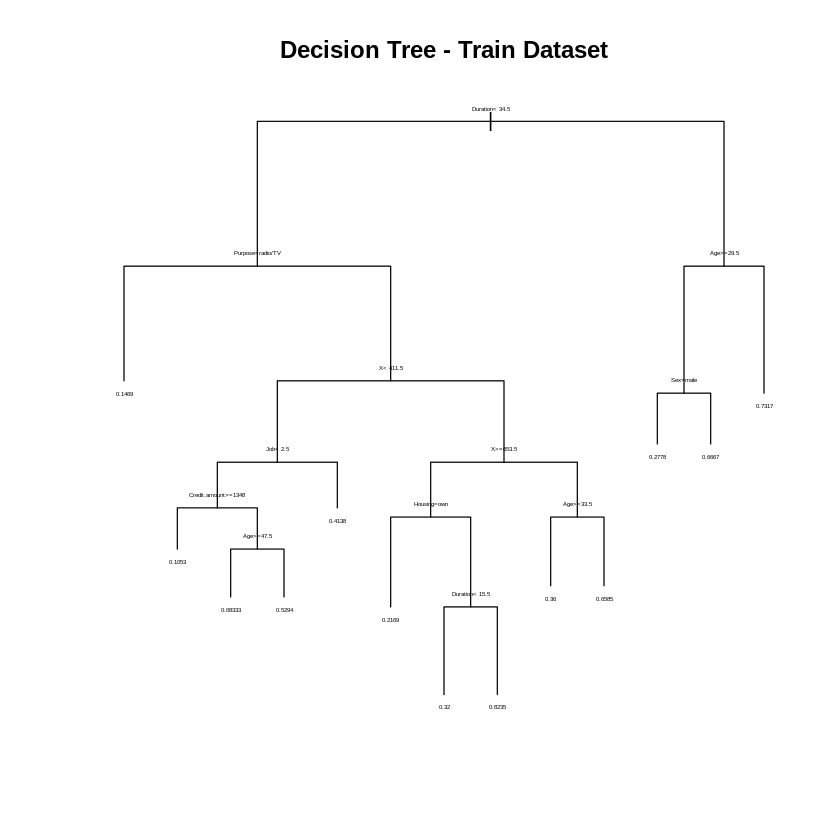

In [51]:
train_index = sample(1:nrow(data),
                      0.6*nrow(data),
                      replace= FALSE);

train = data.frame()
train = data[train_index,]
test = data.frame()
test = data[-train_index,];

train_tree = rpart(Target~., data=train)
plot(train_tree);
text(train_tree, pretty = 1, cex = 0.3);
title(main= "Decision Tree - Train Dataset")

Visualizing in more detail the decision tree and how the model gives probability to each decision using conditional probability rules.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



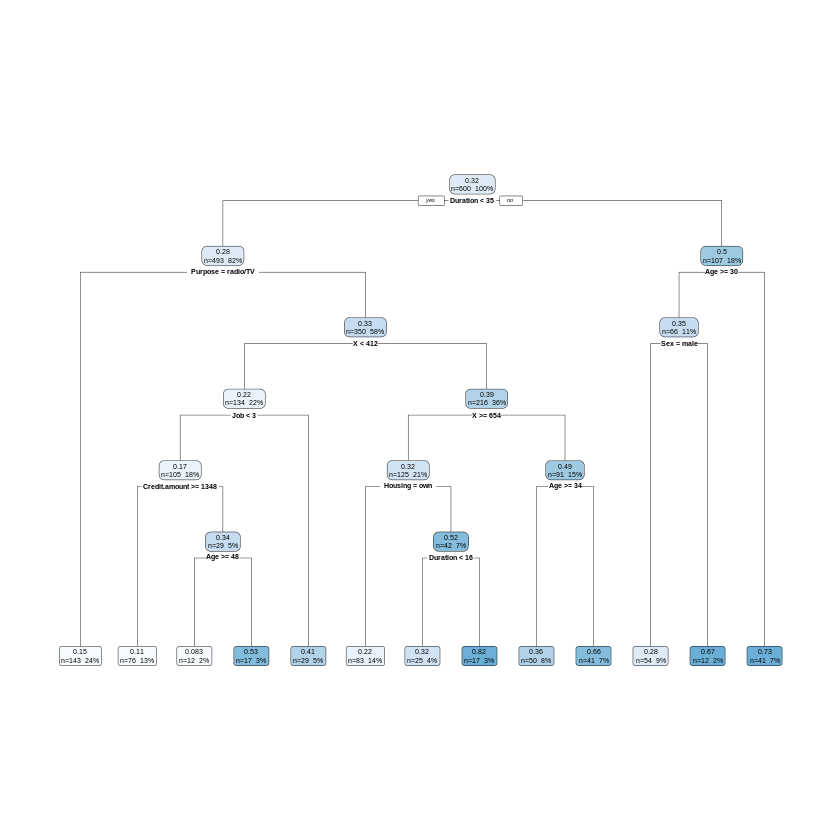

In [53]:
install.packages("rpart.plot")
library("rpart.plot")
rpart.plot(train_tree,type = 2, extra = 101, leaf.round = 1, fallen.leaves = TRUE,
    varlen = 0, tweak = 0.8)

More visually attractive visualization using, and testing, `fancyRpartPlot()` from rattle, which comes from the same algorithm used before.


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



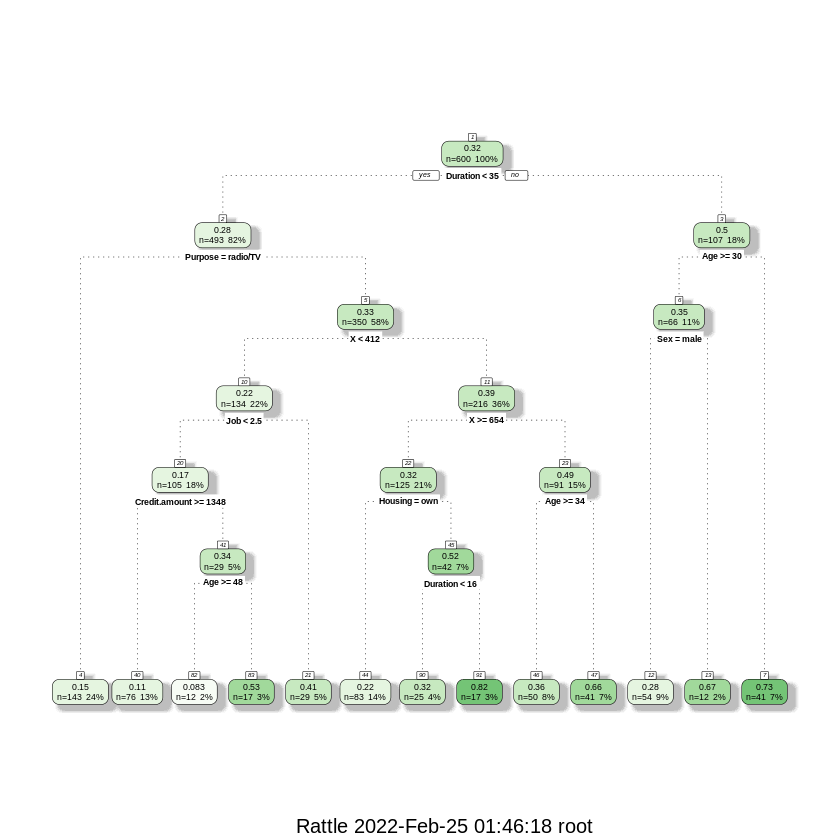

In [52]:
install.packages("RColorBrewer")
install.packages("rattle")
library(RColorBrewer)
library(rattle)
fancyRpartPlot(train_tree)

## Validating Model

Probability of predicting values

In [62]:
test_predict_prob = predict(train_tree, newdata = test)
#showing the first values
head(test_predict_prob)

4         9        11        12        17        19 
0.2777778 0.1468531 0.5294118 0.7317073 0.1468531 0.4137931

Simple confusion matrix to visualize prediction

In [63]:
test_predict = as.integer(predict(train_tree, test, type = "vector")>=0.5)
table(predicted=test_predict, actual=test$Target)

         actual
predicted   0   1
        0 221  73
        1  68  38

More elaborate confusion matrix to have statistical metrics on precision, accuracy, pvalue and more about the conditional probability predicted by the model using the test dataset

In [71]:
install.packages('caret')
library(caret)

confusionMatrix(data=factor(test_predict), reference = factor(test$Target))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 221  73
         1  68  38
                                          
               Accuracy : 0.6475          
                 95% CI : (0.5985, 0.6943)
    No Information Rate : 0.7225          
    P-Value [Acc > NIR] : 0.9996          
                                          
                  Kappa : 0.1086          
                                          
 Mcnemar's Test P-Value : 0.7362          
                                          
            Sensitivity : 0.7647          
            Specificity : 0.3423          
         Pos Pred Value : 0.7517          
         Neg Pred Value : 0.3585          
             Prevalence : 0.7225          
         Detection Rate : 0.5525          
   Detection Prevalence : 0.7350          
      Balanced Accuracy : 0.5535          
                                          
       'Positive' Class : 0               
                              